In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv("Real_estate.csv")

In [6]:
print("\nSummary statistics:")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
df.info()

print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())


Summary statistics:

First 5 rows:
   ID  Garage_Size  Num_Bathrooms  Num_Bedrooms  Square_Feet  Year_Built  \
0   0           33              1             3   218.033887        1983   
1   1           32              2             5   112.560725        2000   
2   2           41              1             4   188.588513        2002   
3   3           47              3             4   236.511220        1914   
4   4           27              1             1    72.821669        1928   

           Price  
0  688446.038516  
1  677859.953933  
2  675707.992691  
3  702645.571919  
4  298871.665267  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   Garage_Size    500 non-null    int64  
 2   Num_Bathrooms  500 non-null    int64  
 3   Num_Bedrooms   500 non-null    int64  
 4   Squar

In [7]:
df = df.dropna()
print(df.isnull().sum())

ID               0
Garage_Size      0
Num_Bathrooms    0
Num_Bedrooms     0
Square_Feet      0
Year_Built       0
Price            0
dtype: int64


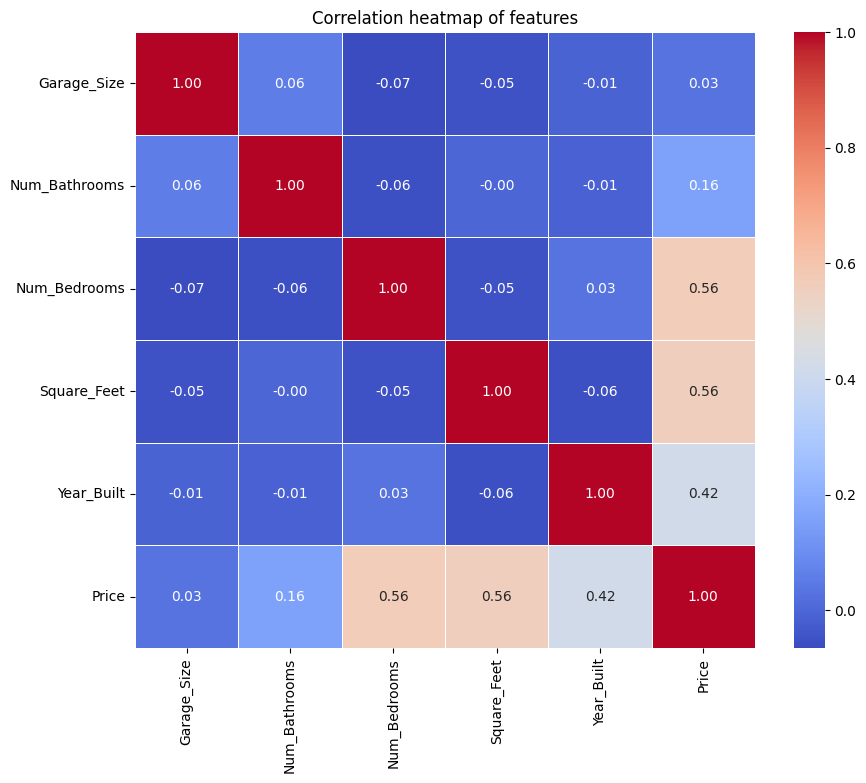

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(columns=['ID']).corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5)
plt.title("Correlation heatmap of features")
plt.show()

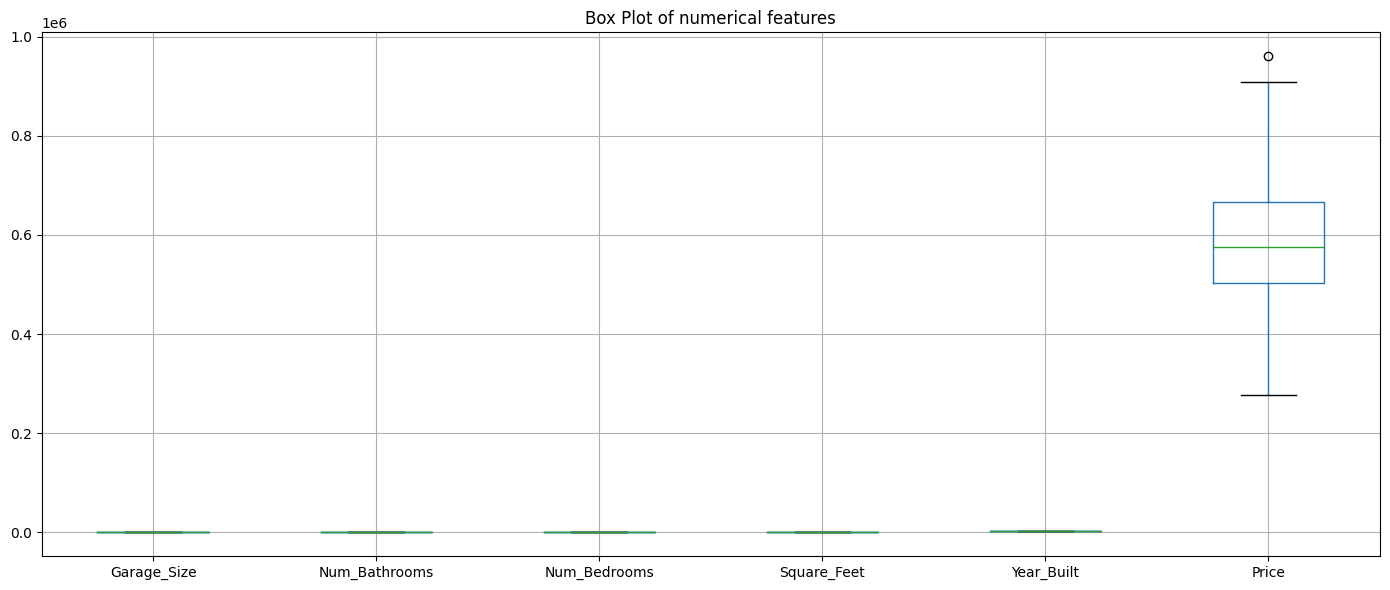

In [9]:
num_cols = df.drop(columns=['ID']).columns
plt.figure(figsize=(14, 6))
df[num_cols].boxplot()
plt.title("Box Plot of numerical features")
plt.tight_layout()
plt.show()

In [10]:
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [11]:
print("MODEL PERFORMANCE")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

MODEL PERFORMANCE
Mean Absolute Error (MAE): 27323.322301438424
Mean Squared Error (MSE): 1249349087.1073172
R² Score: 0.912543973139956



MODEL PERFORMANCE  VISUALIZATION


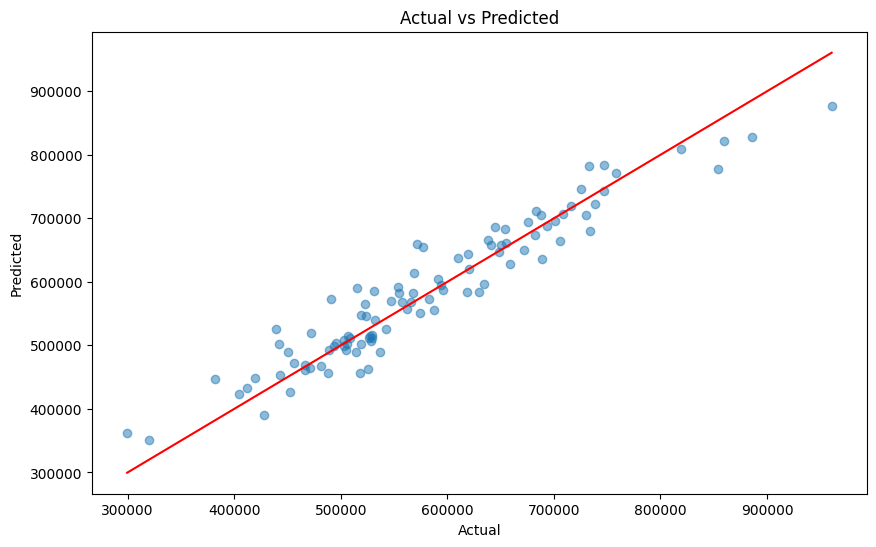

In [12]:
print("\nMODEL PERFORMANCE  VISUALIZATION")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [13]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results.to_csv("predictions.csv", index=False)
print("Saved predictions to predictions.csv")


Saved predictions to predictions.csv
